## SURYA CHALLAGALI

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import calendar

import datetime as dt

In [2]:
unemployed = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
unemployed.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
unemployed.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
unemployed.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [7]:
unemployed.shape

(267, 9)

In [8]:
unemployed.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
unemployed.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [10]:
unemployed['Date'] = pd.to_datetime(unemployed['Date'], dayfirst=True)
unemployed['Frequency']= unemployed['Frequency'].astype('category')
unemployed['Month'] =  unemployed['Date'].dt.month
unemployed['Month_Num'] = unemployed['Month'].apply(lambda x : int(x))
unemployed['Month_Name'] =  unemployed['Month_Num'].apply(lambda x: calendar.month_abbr[x])
unemployed['Region'] = unemployed['Region'].astype('category')

In [11]:
unemployed.drop(columns='Month',inplace=True)

In [13]:
unemployed_stats = unemployed[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(unemployed_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [15]:
region_stats = unemployed.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)

region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


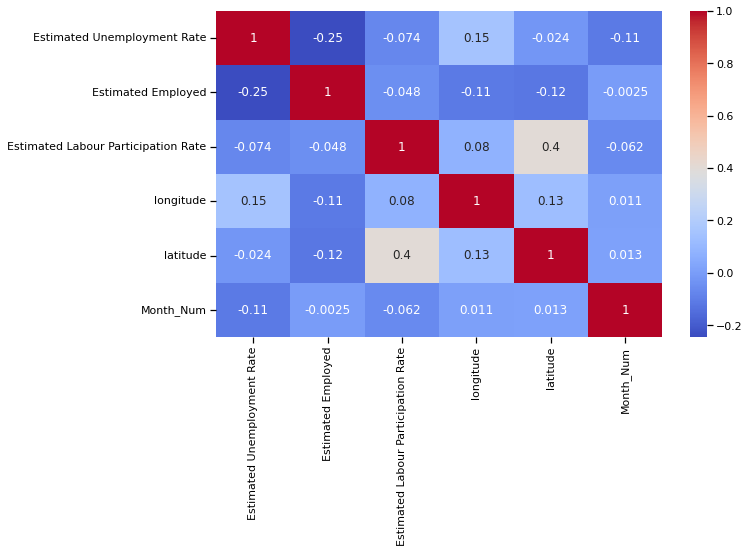

In [15]:
heat_maps = unemployed[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_Num']]
heat_maps = heat_maps.corr()

# Plotting the Figure
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='coolwarm');

In [17]:
fig = px.box(unemployed, x = 'States', y = 'Estimated Unemployment Rate', color = 'States', title='Unemployment Rate', template='plotly')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [16]:
fig = px.scatter_matrix(unemployed, template = 'plotly', dimensions = ['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], color = 'Region')
fig.show()

In [17]:
plot_ump = unemployed[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x = 'States', y = 'Estimated Unemployment Rate', color = 'States', title = 'Average Unemployment Rate in each State', template = 'plotly')
fig.show()

In [18]:
fig = px.bar(unemployed, x = 'Region', y = 'Estimated Unemployment Rate', animation_frame = 'Month_Name', color = 'States', title='Unemployment Rate across region from Jan 2020 to Oct 2020', height = 700, template = 'plotly')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [19]:
unemplo_df = unemployed[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path = ['Region','States'], values = 'Estimated Unemployment Rate', color_continuous_scale = 'Plasma', title = 'Unemployment Rate in each Region and State', height = 650, template = 'ggplot2')
fig.show()

In [20]:
fig = px.scatter_geo(unemployed,'longitude', 'latitude', color = "Region", hover_name = "States", size = "Estimated Unemployment Rate", animation_frame = "Month_Name",scope = 'asia', template = 'plotly', title = 'Impact of Lockdown on Employement across Regions')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_geos(lataxis_range = [5, 35], lonaxis_range = [65, 100], oceancolor = "#6dd5ed", showocean = True)
fig.show()

In [18]:
lock = unemployed[(unemployed['Month_Num'] >= 4) & (unemployed['Month_Num'] <=7)]
bf_lock = unemployed[(unemployed['Month_Num'] >= 1) & (unemployed['Month_Num'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before Lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States',  'Unemployment Rate after Lockdown', 'Unemployment Rate before Lockdown']
g_lock.head()

,States,Unemployment Rate after Lockdown,Unemployment Rate before Lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [19]:
g_lock['Percentage change in Unemployment'] = round(g_lock['Unemployment Rate after Lockdown'] - g_lock['Unemployment Rate before Lockdown'] / g_lock['Unemployment Rate before Lockdown'], 2)
plot_per = g_lock.sort_values('Percentage change in Unemployment')
fig = px.bar(plot_per, x = 'States', y = 'Percentage change in Unemployment', color = 'Percentage change in Unemployment', title = 'Percentage change in Unemployment in each State after Lockdown', template = 'ggplot2')
fig.show()

In [20]:
def sort_impact(x):
    if x <= 10:
        return 'Least Impacted States'
    elif x <= 20:
        return 'Large Impacted States'
    elif x <= 30:
        return 'Larger Impacted States'
    elif x <= 40:
        return 'Most impacted States'
    return x

In [21]:
plot_per['Impact Status'] = plot_per['Percentage change in Unemployment'].apply(lambda x:sort_impact(x))
fig = px.bar(plot_per, y = 'States',x = 'Percentage change in Unemployment', color = 'Impact Status', title = 'Impact of Lockdown on Employment across States', template = 'ggplot2', height = 650)
fig.show()

Most and Larger Impacted States/UT

1.   Puducherry
2.   Jharkhand
3.   Bihar
4.   Haryana
5.   Tripura
6.   Tamil Nadu
7.   Delhi



Least Impacted States/UT

1.   Meghalaya
2.   Assam
3.   Uttarakhand
4.   Sikkim
5.   Gujarat
6.   Telangana
7.   Chhattisgarh